In [1]:
import requests
import urllib
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import re
#INPUT START
keywords = ["嬰兒口腔清潔"] #["嬰兒口腔清潔", "口腔清潔棒"]
from_page, to_page = 1, 4
product_id = 999357567
seller_id = 60789123
#INPUT END
#run this until right session
# constants
headers = {
    "user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.85 Safari/537.36",
    "x-api-source" : "pc",
    'referer': "https://shopee.tw/search?keyword=" + urllib.parse.quote(keywords[0])
}
#check right session
url = ("https://shopee.tw/api/v4/search/search_items?by=relevancy&keyword=" + 
       urllib.parse.quote(keywords[0]) + 
       "&limit=50&newest=" + 
       str(0) +
       "&order=desc&page_type=search&scenario=PAGE_GLOBAL_SEARCH&version=2")
s = requests.session()
r = s.get(url, headers=headers)
if r.status_code == requests.codes.ok:
    data = r.json()

items_dict = data['items']
print(items_dict[0]['item_basic']['name'])
print(items_dict[5]['item_basic']['name'])
print(items_dict[10]['item_basic']['name'])

#dont run this anymore

【Lab52齒妍堂】口腔清潔棒30入 獨立滅菌 清潔嬰幼兒舌苔/奶垢 寶寶牙刷 寶寶口腔清潔 乳牙清潔 紗布牙刷 清潔棒
【Lab52齒妍堂】口腔清潔棒30入 獨立滅菌 清潔嬰幼兒舌苔/奶垢 寶寶牙刷 寶寶口腔清潔 乳牙清潔 紗布牙刷 清潔棒
【新手媽咪激推PLUS】Lab52齒妍堂 含鈣口腔噴霧2入+口腔清潔棒30入 口腔清潔紗布 兒童噴劑 嬰兒口腔 奶睡必備


In [2]:
def parse(item, keyword, ranking):
    search_list.append(keyword)
    ranking_list.append(ranking)
    itemid_list.append(item['item_basic']['itemid'])
    shopid_list.append(item['item_basic']['shopid'])
    itemid = item['item_basic']['itemid']
    shopid = item['item_basic']['shopid']
    name_list.append(item['item_basic']['name'])
    historical_sold_list.append(item['item_basic']['historical_sold'])
    liked_count_list.append(item['item_basic']['liked_count'])
    view_count_list.append(item['item_basic']['view_count'])
    cmt_count_list.append(item['item_basic']['cmt_count'])
#     if (item['item_basic']['discount'] != None or
#         item['item_basic']['add_on_deal_info'] != None or 
#         item['item_basic']['bundle_deal_info'] != None):
#         temp = ""
#         if item['item_basic']['discount'] != None:
#             temp += item['item_basic']['discount'] + "% off"
#         if item['item_basic']['add_on_deal_info'] != None:
#             temp += item['item_basic']['add_on_deal_info']['add_on_deal_label'] + ", "
#         if item['item_basic']['bundle_deal_info'] != None:
#             temp += item['item_basic']['bundle_deal_info']['bundle_deal_label'] + ", "
#         raw_discount_list.append(temp)
#     else:
#         raw_discount_list.append(None)
    rating_star_list.append(np.round(item['item_basic']['item_rating']['rating_star'], 1))
    rating_count_list.append(item['item_basic']['item_rating']['rating_count'][0])
    if item['item_basic']['shopee_verified']:
        shopee_verified_list.append("certified shop")
    elif item['item_basic']['is_official_shop']:
        shopee_verified_list.append("certified shop ＋")
    else:
        shopee_verified_list.append(None)
    if item['item_basic']['show_free_shipping']:
        show_free_shipping_list.append("free shipping")
    else:
        show_free_shipping_list.append(None)
    if item['ads_keyword'] == "wkdaelpmissisiht":
        ads_keyword_list.append("auto ads")
    elif item['ads_keyword'] == None:
        ads_keyword_list.append(None)
    else:
        ads_keyword_list.append(item['ads_keyword'])
    return item['item_basic']['shopid'], item['item_basic']['itemid']


In [3]:
def get_hashtags_and_categories(shop_id, item_id):
    headers_details = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.85 Safari/537.36',
                'x-api-source': 'pc',
                'referer': ("https://shopee.tw/product/" + 
                str(shop_id) + 
                "/" + 
                str(item_id))
                }
    url_details = ("https://shopee.tw/api/v2/item/get?itemid=" + 
           str(item_id) + 
           "&shopid=" +
           str(shop_id))
    r_details = s.get(url_details, headers=headers_details)
    #parse details
    if r_details.status_code == requests.codes.ok:
        data_details = r_details.json()
    if data_details == None or data_details['item'] == None:
        hashtag_list.append([])
        category_list.append([])
        return
    description = data_details['item']['description']
    if description == None:
        hashtag_list.append([])
        category_list.append([])
        return
    first_hashtag_index = 0
    for i in range(len(description)):
        if description[i] == "#":
            first_hashtag_index = i
            break
    hashtag_description = description[i:]
    hashtags = hashtag_description.split("#")
    hashtags = hashtags[1:]
    hashtag_cleaned = []
    for hashtag in hashtags:
        pattern = r'/[a-z]|[ ]'
        hashtag_cleaned.append(re.sub(pattern, '', hashtag))
    hashtags = hashtag_cleaned
    if hashtags == None or len(hashtags) == 0:
        hashtags = []

    #categories
    categories = []
    for i in range(3):
        if i < len(data_details['item']['categories']):
            categories.append(data_details['item']['categories'][i]['display_name'])
    
    hashtag_list.append(hashtags)
    category_list.append(categories)

In [4]:
search_list = []
ranking_list = []
itemid_list = []
shopid_list = []
name_list = []
historical_sold_list = []
liked_count_list = []
view_count_list = []
cmt_count_list = []
raw_discount_list = []
rating_star_list = []
rating_count_list = []
shopee_verified_list = []
show_free_shipping_list = []
ads_keyword_list = []
hashtag_list = []
category_list = []
for keyword in keywords:
    ranking = 1
    pages = range(from_page - 1, to_page)
    headers = {
            "user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.85 Safari/537.36",
            "x-api-source" : "pc",
            'referer': "https://shopee.tw/search?keyword=" + urllib.parse.quote(keyword)
            }
    for i in pages:
        url = ("https://shopee.tw/api/v4/search/search_items?by=relevancy&keyword=" + 
               urllib.parse.quote(keyword) + 
               "&limit=50&newest=" + 
               str(i * 50) +
               "&order=desc&page_type=search&scenario=PAGE_GLOBAL_SEARCH&version=2")
        r = s.get(url, headers = headers)
        if r.status_code == requests.codes.ok:
            data = r.json()
        items_dict = data['items']
        for item in items_dict:
            shop_id, item_id = parse(item, keyword, ranking)
            get_hashtags_and_categories(shop_id, item_id)
            ranking += 1
            
df = pd.DataFrame({
    "search_word": search_list,
    "item_ranking": ranking_list,
    "item_name": name_list,
    "shop_id": shopid_list,
    "item_id": itemid_list,
    "item_popularity": view_count_list,
    "item_sales": historical_sold_list,
    "item_likes": liked_count_list,
    "item_comments": cmt_count_list,
    "item_rating_val": rating_star_list,
    "item_ratings": rating_count_list,
    "shop_certified": shopee_verified_list,
    "item_discount": raw_discount_list,
    "item_free_shipping": show_free_shipping_list,
    "item_ads": ads_keyword_list,
    "item_hashtags": hashtag_list,
    "item_categories": category_list
})
                

In [5]:
pattern = r"\n|\r|\t|-"
temp2 = []
for hashtags in df["item_hashtags"]:
    temp = []
    for hashtag in hashtags:
        temp.append(re.sub(pattern, "", hashtag))
    temp2.append(temp)
df["item_hashtags"] = temp2
df.head(5)

,search_word,item_ranking,item_name,shop_id,item_id,item_popularity,item_sales,item_likes,item_comments,item_rating_val,item_ratings,shop_certified,item_discount,item_free_shipping,item_ads,item_hashtags,item_categories
0,嬰兒口腔清潔,1,【Lab52齒妍堂】口腔清潔棒30入 獨立滅菌 清潔嬰幼兒舌苔/奶垢 寶寶牙刷 寶寶口腔清潔...,60789123,999357567,2509,5632,1349,1927,5.0,1927,certified shop,"加價購,",None,嬰兒口腔清潔,"[快速出貨, 口腔清潔, 口腔清潔棒, 舌苔奶垢救星, 新生兒, 乳牙刷, 寶寶口腔清潔, ...","[母嬰用品, 嬰幼, 嬰幼童口]"
1,嬰兒口腔清潔,2,台灣現貨🔥嬰兒口腔清潔棒30入 口腔乳牙清潔 幼兒口腔清潔棒 口腔清潔棒嬰兒 奶垢清潔棉棒 ...,20459013,4050203809,1722,1600,203,302,5.0,302,None,"9.5% off100 件 9.9折,",None,寶寶口腔清潔,[],"[母嬰用品, 清潔, 其他]"
2,嬰兒口腔清潔,3,【奶睡必備】Lab52齒妍堂 含鈣健齒噴霧Plus 20ml 口味任選 含鈣量提升 兒童噴劑...,60789123,3297868458,4861,4371,404,1050,5.0,1050,certified shop,"3 件 NT$888,",None,兒童口腔噴霧,"[奶睡救星, 夜奶必備, 兒童口腔噴霧, 兒童口腔噴劑, 健齒噴霧]","[母嬰用品, 嬰幼, 嬰幼童口]"
3,嬰兒口腔清潔,4,嬰兒口腔清潔器 口腔清潔棒 新生兒乳牙紗布牙刷 清潔舌苔/奶垢💕papa母嬰💕洗舌頭 口腔棉...,329565483,11222223748,3755,130533,446,1046,5.0,1046,certified shop,"1% off30 件 9.9折,",None,嬰兒口腔清潔紗布,[],"[母嬰用品, 嬰幼, 嬰幼童口]"
4,嬰兒口腔清潔,5,🔥當天出貨🔥口腔清潔棒 嬰兒牙刷 口腔清潔器 舌苔清潔棒 硅膠 舌苔口腔指套 幼兒乳牙 刷軟...,555959309,14919993488,590,38,15,13,5.0,13,None,"2 件 9.9折,",None,口腔清潔,"[口腔清潔棒, 嬰兒牙刷, 口腔清潔器, 舌苔清潔棒, 硅膠, 舌苔口腔指套, 幼兒乳牙, ...","[母嬰用品, 嬰幼, 嬰幼童口]"


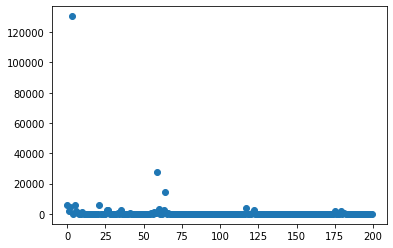

In [6]:
plt.scatter(df.index, df["item_sales"])

In [7]:
df[df["item_sales"] > 120000]

,search_word,item_ranking,item_name,shop_id,item_id,item_popularity,item_sales,item_likes,item_comments,item_rating_val,item_ratings,shop_certified,item_discount,item_free_shipping,item_ads,item_hashtags,item_categories
3,嬰兒口腔清潔,4,嬰兒口腔清潔器 口腔清潔棒 新生兒乳牙紗布牙刷 清潔舌苔/奶垢💕papa母嬰💕洗舌頭 口腔棉...,329565483,11222223748,3755,130533,446,1046,5.0,1046,certified shop,"1% off30 件 9.9折,",None,嬰兒口腔清潔紗布,[],"[母嬰用品, 嬰幼, 嬰幼童口]"


In [29]:
len(df[df["item_sales"] == 0])

131

In [9]:
df_cleaned = df[(df["item_sales"] < 120000) & (df["item_sales"] > 0)]

In [10]:
predictors = list(df_cleaned.corr().loc[:, "item_sales"].sort_values(ascending = False).iloc[1:5].index)
predictors

['item_comments', 'item_ratings', 'item_likes', 'item_popularity']

In [11]:
#colinearity
df_cleaned.corr().loc[predictors, predictors]

,item_comments,item_ratings,item_likes,item_popularity
item_comments,1.000000,1.000000,0.939659,0.729493
item_ratings,1.000000,1.000000,0.939637,0.729484
item_likes,0.939659,0.939637,1.000000,0.762101
item_popularity,0.729493,0.729484,0.762101,1.000000


In [13]:
#item ratings and item comments are the same because you need to give a rating to leave a comment
df_cleaned = df_cleaned.drop("item_ratings", axis = 1)
predictors = list(df_cleaned.corr().loc[:, "item_sales"].sort_values(ascending = False).iloc[1:5].index)
predictors.remove("item_likes")
predictors

['item_comments', 'item_popularity', 'item_rating_val']

In [14]:
from sklearn import linear_model
X = df_cleaned[predictors].reset_index().drop("index", axis = 1)
Y = df_cleaned["item_sales"]
model = linear_model.LinearRegression()
model.fit(X, Y)
print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)

Intercept:  15.796668581974018
Coefficients:  [ 3.82160967  0.07028819 11.95522117]


Root Mean Squared Error: 793.4094810079295


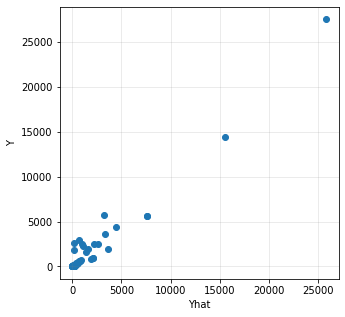

In [15]:
Yhat = []
model_coef = model.coef_
for i in range(len(X)):
    xi = [X[predictors[0]][i], X[predictors[1]][i], X[predictors[2]][i]]
    Yhat.append(sum(model_coef * xi) + model.intercept_)
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(Yhat, Y)
ax.grid(True, color='grey', linestyle='-', linewidth = 0.5, alpha = 0.3)
ax.set_xlabel("Yhat")
ax.set_ylabel("Y");
from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(Y, Yhat)))

Regression Model: y = 2.65*item_comments + 0.1*item_popularity + 30.46*item_rating_val + 7.53
Root Mean Squared Error: 530.4809446460762


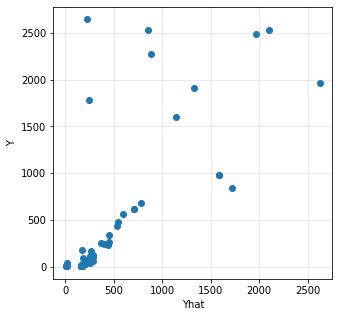

In [16]:
#remove outliers in Y
item_sales = df_cleaned["item_sales"]
IQR = np.percentile(item_sales, 75) - np.percentile(item_sales, 25)
df_extra_clean = df_cleaned[df_cleaned["item_sales"] < (np.percentile(item_sales, 75) + 1.5 * IQR)]

#create regression
from sklearn import linear_model
X = df_extra_clean[predictors].reset_index().drop("index", axis = 1)
Y = df_extra_clean["item_sales"]
model = linear_model.LinearRegression()
model.fit(X, Y)
Yhat = []
coef = model.coef_
for i in range(len(X)):
    xi = [X[predictors[0]][i], X[predictors[1]][i], X[predictors[2]][i]]
    Yhat.append(sum(coef * xi) + model.intercept_)

#plot regression
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(Yhat, Y)
ax.grid(True, color='grey', linestyle='-', linewidth = 0.5, alpha = 0.3)
ax.set_xlabel("Yhat")
ax.set_ylabel("Y")
#ax.plot([min(Yhat), max(Yhat)], [min(Yhat), max(Yhat)], color = "red", alpha = 0.5);
from sklearn.metrics import mean_squared_error
model_str = (
    "y = " + 
    str(round(coef[0], 2)) + "*" + predictors[0] + " + " +
    str(round(coef[1], 2)) + "*" + predictors[1] + " + " +
    str(round(coef[2], 2)) + "*" + predictors[2] + " + " +
    str(round(model.intercept_, 2))
)
print("Regression Model:", model_str)
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(Y, Yhat)))

In [17]:
df_500 = df[df["item_sales"] > 500].reset_index().drop("index", axis = 1)
sales_percentile = list(df_500["item_sales"].sort_values())
predictor_0_percentile = list(df_500[predictors[0]].sort_values())
predictor_2_percentile = list(df_500[predictors[2]].sort_values())

from scipy.stats import percentileofscore
from nltk.util import ngrams

def get_score(row):
    score_base = round(percentileofscore(sales_percentile, df_500["item_sales"].loc[i]) / 10)
    score_0 = round(percentileofscore(predictor_0_percentile, df_500[predictors[0]].loc[i]) / 10 
                    * df_cleaned.corr().loc["item_sales", predictors[0]])
    score_2 = round(percentileofscore(predictor_2_percentile, df_500[predictors[2]].loc[i]) / 10
                    * df_cleaned.corr().loc["item_sales", predictors[2]])
    return score_base + score_0 + score_2
    
def add_ngrams(name):
    name = name.replace(" ", "")
    bigrams = ngrams(list(name), 2)
    trigrams = ngrams(list(name), 3)
    grams_concat = []
    for bigram in bigrams:
        grams_concat.append(bigram[0] + bigram[1])
    for trigram in trigrams:
        grams_concat.append(trigram[0] + trigram[1] + trigram[2])
    for gram in grams_concat:
        if gram not in keywords_dict:
            keywords_dict[gram] = 1
        else:
            keywords_dict[gram] += 1

In [39]:
keywords_dict = {}
for i in range(len(df_500)):
    score = get_score(i)
    hashtags = df_500["item_hashtags"].loc[i]
    for hashtag in hashtags:
        if hashtag not in keywords_dict:
            keywords_dict[hashtag] = score
        else:
            keywords_dict[hashtag] += score
            
    categories = df_500["item_categories"].loc[i]
    for category in categories:
        if category not in keywords_dict:
            keywords_dict[category] = score
        else:
            keywords_dict[category] += score
            
    name = df_500["item_name"].loc[i]
    add_ngrams(name)
           
#item ads
ads = df_500[(df_500["item_ads"] != None) & (df_500["item_ads"] != "auto ads")]["item_ads"]
for ad in ads:
    if ad not in keywords_dict:
        keywords_dict[ad] = 1
    else:
        keywords_dict[ad] += 1
            
keywords_dict = {key: val for key, val in sorted(keywords_dict.items(), key=lambda item: item[1], reverse = True)}
keywords_dict

{'母嬰用品': 203,
 '嬰幼': 178,
 '嬰幼童口': 173,
 '清潔': 86,
 '口腔': 75,
 '保健': 57,
 '口腔清潔棒': 56,
 '個人照護': 55,
 '口腔照護': 55,
 '腔清': 49,
 '口腔清': 49,
 '腔清潔': 48,
 '乳牙刷': 47,
 '口腔清潔': 46,
 '寶寶牙刷': 46,
 '新生兒': 45,
 '乳牙清潔': 42,
 '寶寶口腔清潔': 37,
 '快速出貨': 36,
 '舌苔奶垢救星': 36,
 '紗布巾': 36,
 '清潔棒': 31,
 '牙刷': 30,
 '潔棒': 25,
 '嬰兒口腔清潔': 22,
 '寶寶': 21,
 '兒口': 20,
 '兒口腔': 20,
 '舌苔清潔': 20,
 '舌苔': 19,
 '其他': 18,
 '兒童口腔噴霧': 18,
 '嬰兒': 17,
 '奶睡救星': 17,
 '夜奶必備': 17,
 '兒童口腔噴劑': 17,
 '健齒噴霧': 17,
 '口腔清潔器': 16,
 '蘑菇屋清潔用品🍄蘑菇屋🍄🌸本店均為媽咪和寶寶的產品，歡迎批發零售🌸如果喜歡我們的產品，請給我們5星好評，也不要吝嗇您可愛的買家秀🌸小店不容易，不接受任何差評，收到產品后有任何問題，請立即聯繫店家🌸下標后12天內出貨，47天可到達🌸如果有任何意見都可以和我聯繫🌸小店會對每一位顧客負責！！！材質：矽膠顏色：透明尺寸：約5.5*2.2公分🔔注意事項：1.由於不同顯示器之間的差異，圖片可能不會反映該寶貝的實際顏色。我們保證樣式與圖片中顯示的相同。2.由於手工測量和不同的測量方法，請允許13cm的偏': 16,
 '紗布': 14,
 '嬰兒口': 13,
 '玩具': 12,
 '嬰幼童玩具': 12,
 '乳牙': 11,
 '嬰兒牙刷': 11,
 '紗布棒': 11,
 '現貨': 10,
 '潔器': 10,
 '清潔器': 10,
 '新生兒口腔': 10,
 '口腔清潔棉': 10,
 '清舌苔': 10,
 '口腔清潔紗布': 10,
 '寶寶口腔': 10,
 '台灣': 9,
 '兒童': 9,
 '新生': 9,
 '生兒': 9,
 None: 9,
 '幼兒': 8,
 '寶口': 8,
 '寶寶口': 8,

In [40]:
#calculate priority
my_shop_id = 60789123
keywords = list(keywords_dict.keys())[:30]
keyword_priority = list(keywords_dict.values())[:30]
keyword_rankings = []
keyword_products = []
for keyword in keywords:
    #get data
    headers = {
    "user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.85 Safari/537.36",
    "x-api-source" : "pc",
    'referer': "https://shopee.tw/search?keyword=" + urllib.parse.quote(keyword)
    }
    url = ("https://shopee.tw/api/v4/search/search_items?by=relevancy&keyword=" + 
           urllib.parse.quote(keyword) + 
           "&limit=50&newest=0&order=desc&page_type=search&scenario=PAGE_GLOBAL_SEARCH&version=2")
    r = s.get(url, headers=headers)
    if r.status_code == requests.codes.ok:
        data = r.json()
        
    #get ranking and products
    ranking = 1
    rankings = []
    products = []
    for item in data['items']:
        if item['item_basic']['shopid'] == my_shop_id:
            rankings.append(ranking)
            products.append("rank: " + str(ranking) + ", product: " + str(item['item_basic']['name']))
        ranking += 1
    if len(rankings) == 0:
        keyword_rankings.append(None)
        keyword_products.append(None)
    else:
        keyword_rankings.append(rankings)
        keyword_products.append(products)


In [41]:
ranks = pd.DataFrame({
    "keyword": keywords,
    "priority": keyword_priority,
    "rankings": keyword_rankings,
    "products": keyword_products
})
ranks["rank"] = ranks.reset_index()["index"] + 1
ranks = ranks.set_index("rank")
ranks

,keyword,priority,rankings,products
rank,,,,
1,母嬰用品,203,None,None
2,嬰幼,178,None,None
3,嬰幼童口,173,None,None
4,清潔,86,None,None
5,口腔,75,None,None
6,保健,57,None,None
7,口腔清潔棒,56,[1],"[rank: 1, product: 【Lab52齒妍堂】口腔清潔棒30入 獨立滅菌 清潔嬰..."
8,個人照護,55,None,None
9,口腔照護,55,None,None


In [28]:
ranks.to_csv("/Users/jay/Desktop/Search_Keyword_Ad_Rankings")